In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
length = 7.50241114482312 * 5

def load_profess_den(den_file):
    with open(den_file, 'r') as f:
        temp = f.readline().split()
        dim_x = int(temp[1])
        dim_y = int(temp[3])
        dim_z = int(temp[5])
        den = np.array(temp[10:], dtype=np.float_).reshape((dim_z, dim_x, dim_y))
        return den

def load_abacus_den(den_file):
    den = np.loadtxt(den_file, skiprows=18).reshape(192,27,27)
    return den

In [3]:
files = ['./KS-BLPS/fcc100/OUT.blpstest/SPIN1_CHG','./WT/fcc100/Al.den','./WGC//fcc100/Al.den','./1PROFESS_KERNEL//fcc100/Al.den','./3PROFESS_KERNEL//fcc100/Al.den','./4PROFESS_KERNEL//fcc100/Al.den','./5PROFESS_KERNEL/fcc100/Al.den']
labels = ['KS-BLPS', 'WT', 'WGC', r'$\rm{TKK}^{\rm{m}}_{\rm{8}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{12}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{20}}$']

ks = load_abacus_den(files[0])
wt = load_profess_den(files[1])
wgc = load_profess_den(files[2])
tkk8 = load_profess_den(files[3])
tkk12 = load_profess_den(files[4])
tkk16 = load_profess_den(files[5])
tkk20 = load_profess_den(files[6])

data = [
    ks,
    wt,
    wgc,
    tkk8,
    tkk12,
    tkk16,
    tkk20
]

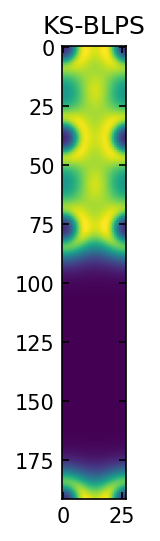

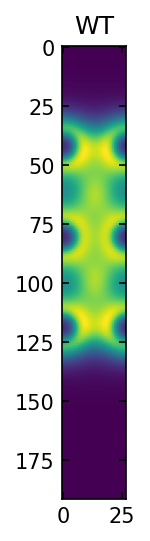

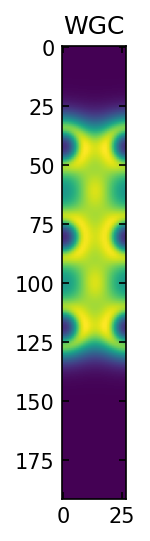

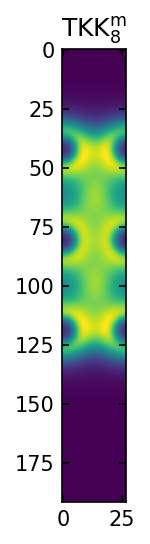

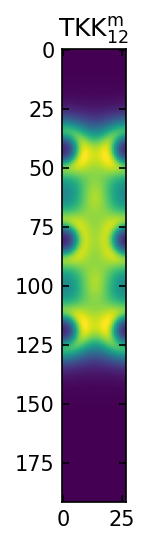

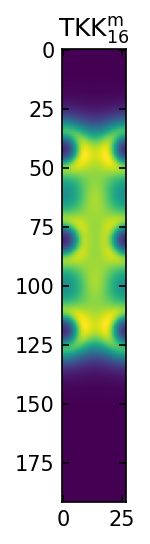

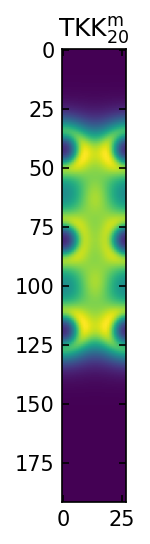

In [4]:
for i, each in enumerate(files):
    if 'KS' in each:
        den = load_abacus_den(each)
        plt.figure(dpi=150)
        plt.imshow(den[:,0,:])
        # plt.imshow(np.vstack((den[150:,0,:],den[:150,0,:])))
        plt.title(labels[i])
        plt.show()
    elif 'HC' in each:
        continue
    else:
        den = load_profess_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[150:,0,:],den[:150,0,:])))
        plt.title(labels[i])
        plt.show()

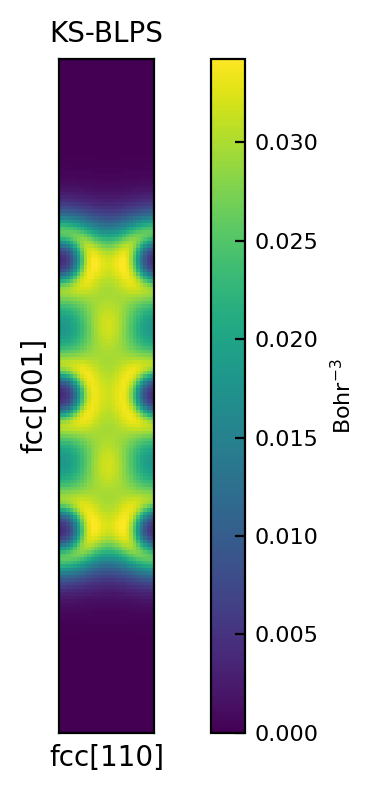

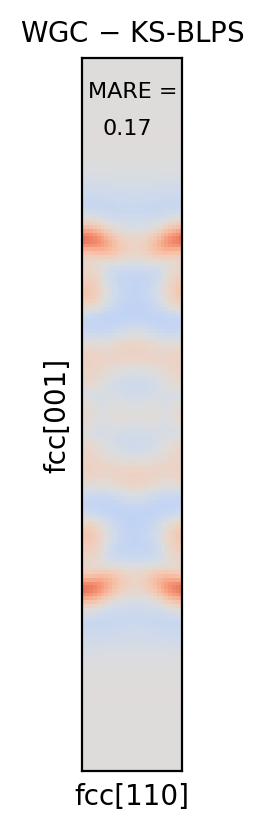

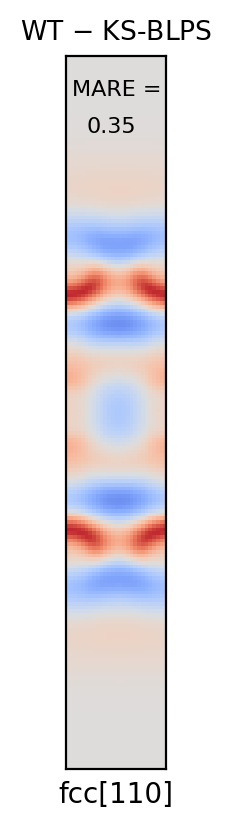

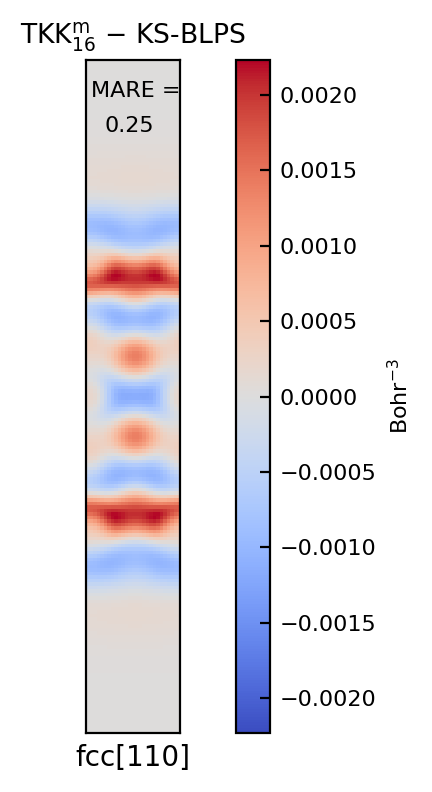

In [11]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - wgc[:,0,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# #fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(np.vstack((ks[135:,0,:],ks[:135,0,:])))
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=10)
plt.xlabel('fcc[110]', fontsize=10)
plt.title('KS-BLPS', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[135:,0,:],wt[:135,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[135:,0,:],tkk16[:135,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

plt.figure(dpi=200)
# plt.subplot(gs[0,5:9])
plt.imshow(np.vstack((wgc[135:,0,:] - ks[135:,0,:],wgc[:135,0,:] - ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(wgc-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(np.vstack([wgc[150:,0,:] - ks[150:,0,:],wgc[:110,0,:] - ks[:110,0,:]]))/np.vstack([ks[150:,0,:], ks[:110,0,:]])), fontsize=8)
# plt.text(5, 20, "%.2f" % np.mean(np.abs(wgc-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(wgc-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=10)
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WGC $-$ KS-BLPS', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(np.vstack((wt[135:,0,:] - ks[135:,0,:],wt[:135,0,:] - ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(wt-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(np.vstack([wt[150:,0,:] - ks[150:,0,:],wt[:110,0,:] - ks[:110,0,:]]))/np.vstack([ks[150:,0,:], ks[:110,0,:]])), fontsize=8)
# plt.text(5, 20, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WT $-$ KS-BLPS')

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(np.vstack((tkk16[135:,0,:] - ks[135:,0,:],tkk16[:135,0,:] - ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(np.vstack([tkk16[150:,0,:] - ks[150:,0,:],tkk16[:110,0,:] - ks[:110,0,:]]))/np.vstack([ks[150:,0,:], ks[:110,0,:]])), fontsize=8)
# plt.text(5, 20, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$ $-$ KS-BLPS')
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(gs[7])

In [6]:
for i, each in enumerate(data):
    print(labels[i] + ":")
    print("MARE: {0}".format(np.mean(np.abs((each - ks)/ks))))
    print("MAE: {0}".format(np.mean(np.abs((each - ks)))))

KS-BLPS:
MARE: 0.0
MAE: 0.0
WT:
MARE: 4.243603361116631
MAE: 0.0003681419829648507
WGC:
MARE: 9.478230805222314
MAE: 0.00013252637149573494
$\rm{TKK}^{\rm{m}}_{\rm{8}}$:
MARE: 4.482069592574722
MAE: 0.0003774137497232718
$\rm{TKK}^{\rm{m}}_{\rm{12}}$:
MARE: 4.046163519941085
MAE: 0.0003957627182818889
$\rm{TKK}^{\rm{m}}_{\rm{16}}$:
MARE: 5.8540300956349345
MAE: 0.00040400404247198005
$\rm{TKK}^{\rm{m}}_{\rm{20}}$:
MARE: 5.540602508960871
MAE: 0.00041890226004335964


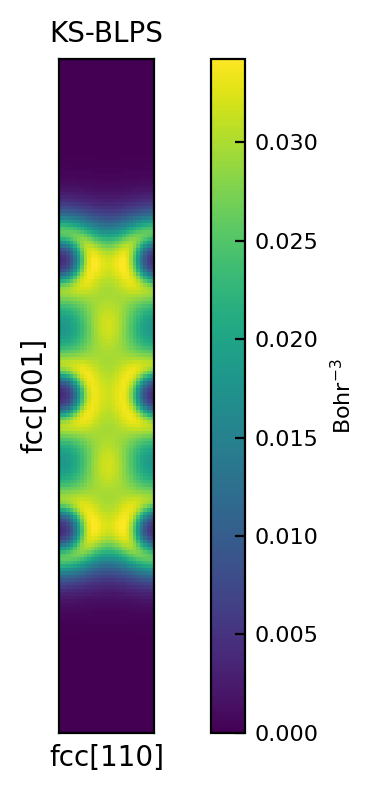

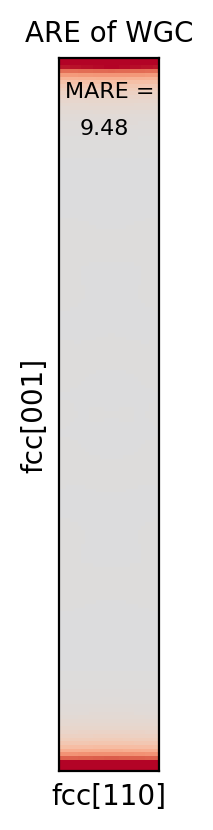

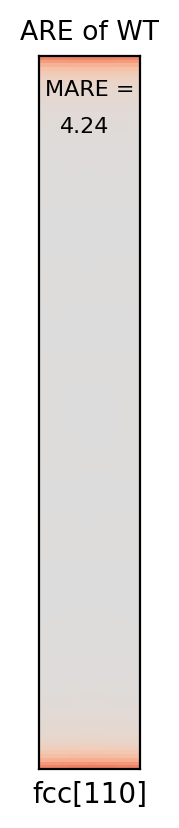

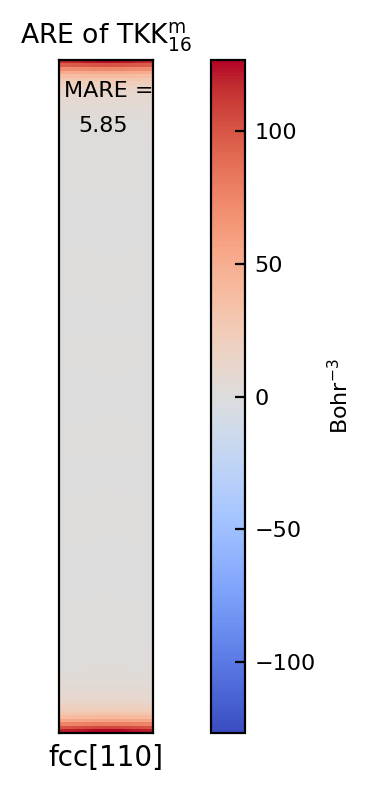

In [7]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:])/ks[:,0,:], np.abs(ks[:,0,:] - tkk16[:,0,:])/ks[:,0,:], np.abs(ks[:,0,:] - wgc[:,0,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# #fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(np.vstack((ks[135:,0,:],ks[:135,0,:])))
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=10)
plt.xlabel('fcc[110]', fontsize=10)
plt.title('KS-BLPS', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[135:,0,:],wt[:135,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[135:,0,:],tkk16[:135,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

plt.figure(dpi=200)
# plt.subplot(gs[0,5:9])
plt.imshow(np.vstack(((wgc[135:,0,:] - ks[135:,0,:])/ks[135:,0,:],(wgc[:135,0,:] - ks[:135,0,:])/ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(wgc-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(wgc-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(wgc-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('fcc[001]', fontsize=10)
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('ARE of WGC', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(np.vstack(((wt[135:,0,:] - ks[135:,0,:])/ks[135:,0,:],(wt[:135,0,:] - ks[:135,0,:])/ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(wt-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('ARE of WT')

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(np.vstack(((tkk16[135:,0,:] - ks[135:,0,:])/ks[135:,0,:],(tkk16[:135,0,:] - ks[:135,0,:])/ks[:135,0,:])), cmap=cm.coolwarm)
# plt.text(2, 10, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(1, 10, "MARE =", fontsize=8)
plt.text(5, 20, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(3, 10, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('fcc[110]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'ARE of $\rm{TKK}^{\rm{m}}_{\rm{16}}$')
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(gs[7])